ANURADHA ARUMUGAM

OASIS INFOBYTE

TASK 5:Sales Prediction using Advertisement data


In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import sklearn.metrics as sm

In [24]:
df=pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: >

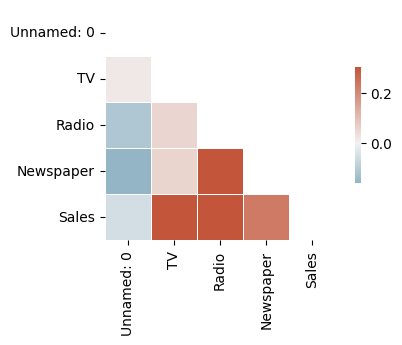

In [8]:
# Computing the correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df=df.drop('Unnamed: 0',axis=1)

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


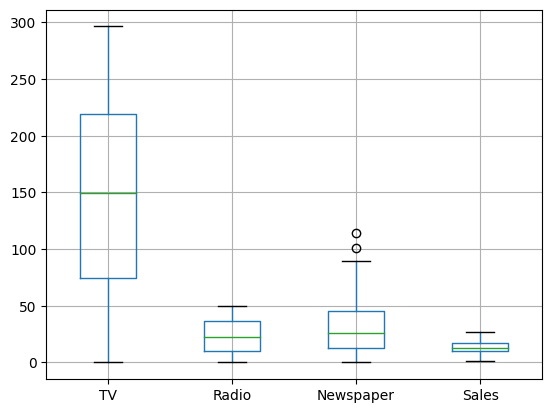

In [32]:
boxplot = df.boxplot(column=['TV', 'Radio', 'Newspaper','Sales'])

In [35]:
q_low = df["Newspaper"].quantile(0.01)
q_hi  = df["Newspaper"].quantile(0.99)

df = df[(df["Newspaper"] < q_hi) & (df["Newspaper"] > q_low)]

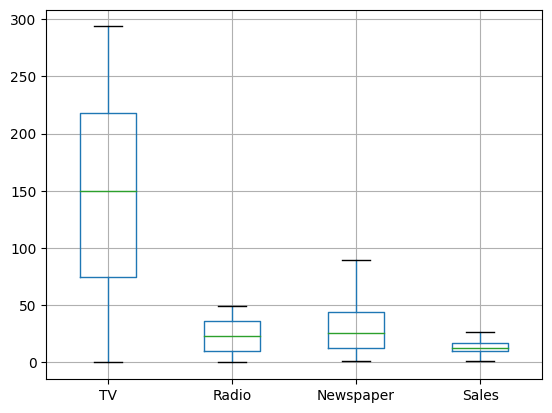

In [36]:
boxplot = df.boxplot(column=['TV', 'Radio', 'Newspaper','Sales'])

In [37]:
y=df['Sales']
df=df.drop(['Sales'],axis=1)
x=df

In [41]:
from sklearn.tree import DecisionTreeRegressor
import math
dt = DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("R2 score =", round(sm.r2_score(y_test, y_pred),2))
print("mean_absolute_error =", sm.mean_absolute_error(y_test, y_pred))
print("mean_squared_error =", math.sqrt(sm.mean_absolute_error(y_test, y_pred)))

R2 score = 0.96
mean_absolute_error = 0.7897959183673472
mean_squared_error = 0.8887046294283311
